In [ ]:

%load_ext autoreload
%autoreload 2

from IPython.display import display
from matplotlib import pyplot as plt
from pprint import pprint


from gdutils.rand import DEFAULT_RANDOM_SEED, set_seeds
from vocab_wiktionary_frequency_utils import (
    analyze_word_sample,
    extract_word_url_count_from_wiktionary_frequency_list,
    plot_frequency_vs_commonality,
    wiktionary_cleanup,
)

set_seeds(DEFAULT_RANDOM_SEED)

GREEK_WIKTIONARY_HTML = "/Users/greg/Library/Mobile Documents/3L68KQB4HG~com~readdle~CommonDocuments/Documents/Greek learning/Greek learning - Alexandra/Greek Wiktionary_Frequency lists_Modern Greek_5K Wordlist - Wiktionary, the free dictionary.html"

In [ ]:
# Read the local HTML file
with open(GREEK_WIKTIONARY_HTML, "r", encoding="utf-8") as f:
    html_content = f.read()

html_cleaned = wiktionary_cleanup(html_content)

# Extract the word frequency data
words_data = extract_word_url_count_from_wiktionary_frequency_list(html_content)

# Look at the first 10 entries
pprint(words_data[:10])

# Basic statistics
print(f"\nTotal number of words: {len(words_data)}")
print(f"Most frequent word: {max(words_data, key=lambda x: x['count'])}")

In [ ]:
words_data[-10:]

In [ ]:
# Analyze sample of words
results = analyze_word_sample(
    words_data=words_data,
    sample_size=4,  # Change to 100 when ready
    target_language_code="el",  # ISO code for Greek
    random_seed=DEFAULT_RANDOM_SEED,
    verbose=1
)

# Print summary of results
print(f"\nProcessed {len(results)} words")
print(f"Errors: {sum(1 for r in results if r['error'] is not None)}")
print(f"Found lemmas: {sum(1 for r in results if r['lemma_data'] is not None)}")


Sample comparisons:
Word: μου        Count: 1908383  AI Commonality: 1.00
Word: εδώ        Count: 596977   AI Commonality: 0.95
Word: χωρίς      Count: 89975    AI Commonality: 0.90
Word: φαίνεται   Count: 74434    AI Commonality: 0.90


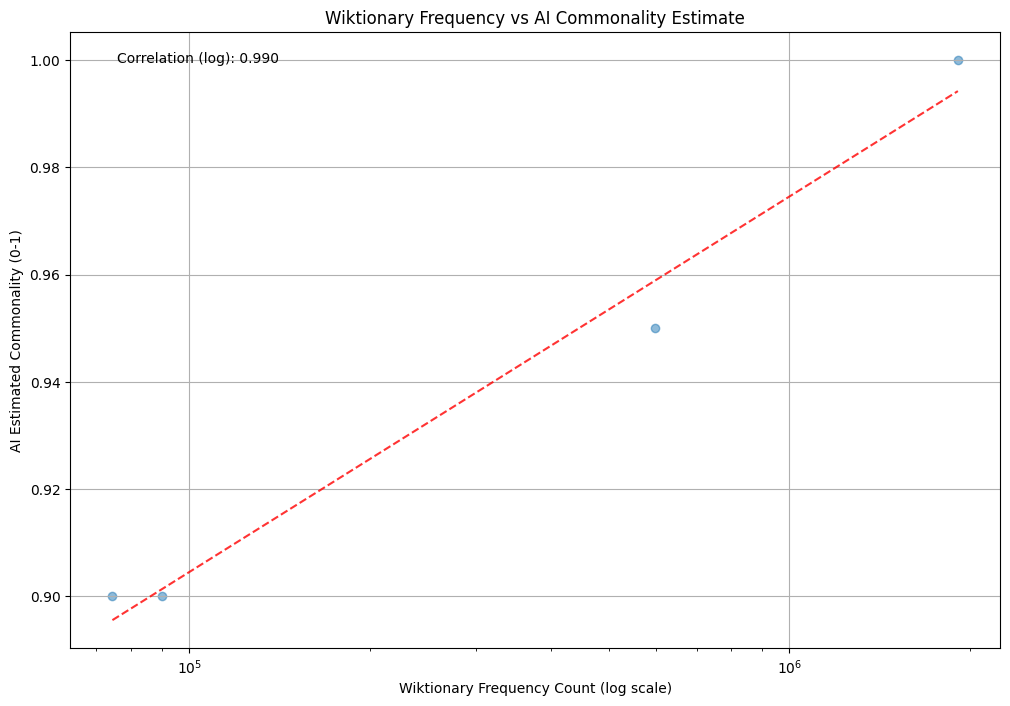

In [25]:
# Create and display plot
fig, ax = plot_frequency_vs_commonality(results)
plt.show()